# Customer Churn Analysis
Goal: use machine learning to predict which customers will likely churn.
<br>Purpose: to reduce marketing expenditures and develop focused retention programs.
***

## Table of Contents 

1. [Introduction](#1.-Introduction)
2. [Dataset](#2.-Dataset)
<br>2.1 [Data Overview](#2.1-Data-Overview)
<br>2.2 [Feature Overview](#2.2-Feature-Overview)
3. [Data Cleaning](#3.-Data-Cleaning)
4. [Exploratory Data Analysis](#4.-Exploratory-Data-Analysis)
<br>4.1 [Visualizing Churn](#4.1-Visualizing-Churn)
<br>4.2 [Summary Statistics of Numerical Features](#4.2-Summary-Statistics-of-Numerical-Features)
<br>4.3 [Distribution of Numerical Features](#4.3-Distribution-of-Numerical-Features)
<br>4.4 [Scatterplot of Churn & Contract by MonthlyCharges and tenure](#4.4-Scatterplot-of-Churn-&-Contract-by-MonthlyCharges-and-tenure)
<br>4.5 [Cluster 1 Analysis](#4.5-Cluster-1-Analysis)
<br>4.6 [Cluster 2 Analysis](#4.6-Cluster-2-Analysis)
<br>4.7 [Cluster 3 Analysis](#4.7-Cluster-3-Analysis)
<br>4.8 [Churn Rate by Demographics](#4.8-Churn-Rate-by-Demographics)
<br>4.9 [Churn Rate by Services](#4.9-Churn-Rate-by-Services)
<br>4.10 [Churn Rate by Account Information](#4.10-Churn-Rate-by-Account-Information)
<br>4.11 [Notable Churn Rates](#4.11-Notable-Churn-Rates)
5. [Preprocessing](#5.-Preprocessing)
<br>5.1 [Creating Dummy Variables](#5.1-Creating-Dummy-Variables)
<br>5.2 [Heatmap of Correlation Coefficients](#5.2-Heatmap-of-Correlation-Coefficients)
6. [Model Building](#6.-Model-Building)
<br>6.1 [k-NN Model](#6.1-k-NN-Model)
<br>6.2 [SVM Model](#6.2-SVM-Model)
<br>6.3 [Decision Tree Model](#6.3-Decision-Tree-Model)
<br>6.4 [Logistic Regression Model](#6.4-Logistic-Regression-Model)
***

## 1. Introduction 

### 1.1 Problem

Acquiring a new customer can be five times more expensive than retaining an existing one. Such a staggering proportion emphasizes the importance of catering to an existing customer’s satisfaction and longevity to generate sales at a high ROI. In fact, increasing customer retention rates by as little as 5% can increase profits by 25 to 95%, according to a study done by Frederick Reichheld of Bain & Company. A key metric in evaluating customer retention is the customer churn rate.

In the telecommunications industry, the churn rate measures the percentage of service subscribers who discontinue their subscriptions over a particular period. Many providers in the industry offer similar services and generate the bulk of their revenue through subscription costs; therefore, the churn rate is a key metric to minimize to sustain subscription revenues.

The varying Internet, television, and telephone service providers available to the public make it easy and desirable for customers to try different services to see which works best for them. Some providers do not even require customers to lock into long-term contracts and give them the flexibility to change providers frequently. Service providers are able to provide more value to customers via short-term contracts by retaining their existing customers and minimizing their churn. 

### 1.2 Approach

1. Edit this 
2. Include the algorithms you're going to use to build the model here and include hyperlinks to them for easy navigation.

The churn detection task is an imbalanced classification problem: where we have two classes we need to identify - churn and no-churn - with one category representing the overwhelming majority of the data points. 

## 2. Dataset

### 2.1 Data Overview

The dataset used in this project is available on Kaggle, [here.](https://www.kaggle.com/blastchar/telco-customer-churn)

Each row represents a customer and each column contains customers' attributes. The dataset includes information about demographics, services, account information, and churn. The "Churn" column is our binary target variable and represents customers who left within the last month.

### 2.2 Feature Overview
(code below left aligns the markdown tables)

In [1]:
%%html
<style>
    table {
        display: inline-block
    }
</style>

**A. Demographics**

| feature_name  | data_type   | description                    | unique_values      |
| ------------- | ----------- | ------------------------------ | ------------------ |
| gender        | categorical | sex                            | "Male" , "Female"  |
| SeniorCitizen | categorical | is senior citizen              | "Yes", "No"        |
| Partner       | categorical | customer has a partner         | "Yes", "No"        |
| Dependents    | categorical | customer has dependents        | "Yes", "No"        |

**B. Services**

| feature_name      | data_type   | description                    | unique_values              |
| ----------------- | ----------- | ------------------------------ | -------------------------- |
| PhoneService      | categorical | has phone service              | "Yes", "No"                |
| MultipleLines     | categorical | has multiple phone lines       | "Yes", "No"                |
| InternetService   | categorical | type of Internet service       | "DSL", "Fiber optic", "No" |
| OnlineSecurity    | categorical | has malware protection         | "Yes", "No"                |
| OnlineBackup      | categorical | has digital backup service     | "Yes", "No"                |
| DeviceProtection  | categorical | has device protection plan     | "Yes", "No"                |
| TechSupport       | categorical | has tech support               | "Yes", "No"                |
| StreamingTV       | categorical | has TV streaming service       | "Yes", "No"                |
| StreamingMovies   | categorical | has movie streaming service    | "Yes", "No"                |

**C. Account Information**

| feature_name      | data_type           | description                            | unique_values                   |
| ----------------- | ------------------- | -------------------------------------- | ------------------------------- |
| customerID        | categorical         | customer identification number         |                                 |
| tenure            | numerical (ordinal) | # of months with company               |                                 |
| Contract          | categorical         | contractual term                       | "Monthly", "Annual", "Biannual" |
| PaperlessBilling  | categorical         | billed via email                       | "Yes", "No"                     |
| PaymentMethod     | categorical         | method of payment on file              | "Electronic Check", "Mailed Check", "Bank transfer (automatic)", "Credit card (automatic)"    |
| MonthlyCharges    | numerical (cardinal)| amount charged to the customer monthly |                         |
| TotalCharges      | numerical (cardinal)| total amount charged to the customer   |                         |

**D. Target Variable**

| feature_name      | data_type         | description                    | unique_values                   |
| ----------------- | ----------------- | ------------------------------ | ------------------------------- |
| Churn             | categorical       | left within the last month     | "Yes", "No"                     |

***

## 3. Data Cleaning

In [5]:
#Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()

#Load dataset
df = pd.read_csv('data/WA_Fn-UseC_-Telco-Customer-Churn.csv', index_col='customerID')

# Identify feature data types and data set shape. 
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), object(17)
memory usage: 1.1+ MB


The output above shows no missing values in the dataset; however, there may be missing values encoded with erroneous symbols. We'll take a closer look at potential missing values in a bit but first, we can see that the **TotalCharges** Series is categorically encoded as an "object" when it should be numerically encoded as "float64" data type. Let's take a closer look at the values in the column.

In [540]:
df.TotalCharges.values

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

We can see that the numbers in the TotalCharges column are encoded as strings. Since the Series contains string values, it may contain null values that are encoded as strings, such as blank spaces or dashes. **After checking for these null values** and imputing or dropping them, we'll convert the Series to float64 data type.

In [7]:
# Identify number of missing (null) values in the data set.
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

At first glance, all features appear to have non-null entries; however, there may still be missing values encoded in different ways. Let's check if any entries in the dataframe contain blank spaces or random symbols that could be used to represent a missing entry.

In [10]:
# Replace any whitespace values with NaN
df = df.replace(r'\s+$', np.nan, regex=True)

# Replace any wild characters (symbols) with NaN
wild_chars = ['?', '-', '.', '_', '*']
for i in wild_chars:
    df[df == i] = np.nan

# Print number of null values 
print(df.isnull().sum())

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


The TotalCharges column contains 11 missing/null values. The records containing null values comprise only 0.16% of the total samples. Since these problematic records account for a small proportion of the total samples, dropping them won't have a significant impact on our analysis. Let's go ahead and drop all records containing null values.

In [11]:
# Drop missing values
df = df.dropna()

# After dropping the missing values from the TotalCharges column, convert it from string to float. 
df.TotalCharges = df.TotalCharges.astype(float)

The missing values have been dropped from the dataset and the TotalCharges column is converted into a numerical feature. Let's display the unique values for each column to see if we can further consilidate the features and/or values.

In [12]:
# Display unique values for each feature.
for col in df:
    print(col)
    print(df[col].unique(), '\n')

gender
['Female' 'Male'] 

SeniorCitizen
['No' 'Yes'] 

Partner
['Yes' 'No'] 

Dependents
['No' 'Yes'] 

tenure
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39] 

PhoneService
['No' 'Yes'] 

MultipleLines
['No phone service' 'No' 'Yes'] 

InternetService
['DSL' 'Fiber optic' 'No'] 

OnlineSecurity
['No' 'Yes' 'No internet service'] 

OnlineBackup
['Yes' 'No' 'No internet service'] 

DeviceProtection
['No' 'Yes' 'No internet service'] 

TechSupport
['No' 'Yes' 'No internet service'] 

StreamingTV
['No' 'Yes' 'No internet service'] 

StreamingMovies
['No' 'Yes' 'No internet service'] 

Contract
['Month-to-month' 'One year' 'Two year'] 

PaperlessBilling
['Yes' 'No'] 

PaymentMethod
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)'] 

MonthlyCharges
[29.85 56.95 53.85 ... 63.1  44.

* Let's 0 and 1 in the SeniorCitizen column with "No" and "Yes", respectively, to keep the binary feature values consistent for one-hot encoding and visualization labeling. We will encode all features numerically for model building during [preprocessing](#5.1-Creating-Dummy-Variables). 
* For the features relating to Services, we replace the "No internet service" value to "No" to eliminate redundancy: the InternetService feature let's us know whether or not the customer had Internet services. 
* We must also replace the "No phone service" value in the MultipleLines feature with "No" to eliminate redunancy: the PhoneService feature let's us know whether or not the customer had phone services.
* For the Contract feature, let's replace the following for simplicity:
    * "Month-to-month" with "Monthly"
    * "One year" with "Annual"
    * "Two year" with "Biannual"

In [13]:
# Replace 0 and 1 with "No" and "Yes" in SeniorCitizen feature
df.SeniorCitizen = df.SeniorCitizen.replace({1:'Yes', 0:'No'})

# Replace "No internet service" with "No"
internet_cols = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
for x in internet_cols:
    df[x] = df[x].replace({'No internet service' : 'No'})

# Replace "No phone service" with "No"
df.MultipleLines = df.MultipleLines.replace({'No phone service' : 'No'})

# Contract feature changes
df.Contract = df.Contract.replace({
    'Month-to-month' : 'Monthly',
    'One year' : "Annual",
    'Two year' : 'Biannual'
})

The feature value consolidations are complete. Let's view all the updates made to our dataset on the first 5 records.

In [14]:
# View all changes made up to this point on the first 5 records
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,No,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Monthly,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,Annual,No,Mailed check,56.95,1889.50,No
3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Monthly,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,No,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,Annual,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Monthly,Yes,Electronic check,70.70,151.65,Yes


The data is cleaned and ready for some [EDA](#4.-Exploratory-Data-Analysis) and [model buidling](#6.-Model-Building)!

***

## 4. Exploratory Data Analysis

### 4.1 Visualizing Churn

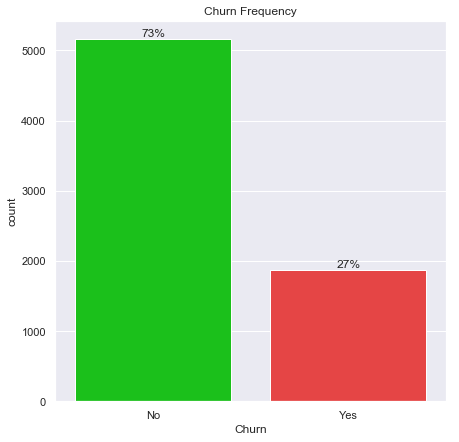

In [15]:
# Define colors
lightgreen = '#00db00'
red = '#ff2b2b'

# Instantiate figure to render plot on
plt.figure(figsize=(7, 7));

# Draw countplot of Churn frequency
ax_vc = sns.countplot(x='Churn', palette=[lightgreen, red], data=df);

# Display percentages above each bar so that the sum per value equals 100%
bars = ax_vc.patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]

for left, right in zip(left_bars, right_bars):
    height_l = left.get_height()
    height_r = right.get_height()
    total = height_l + height_r

    ax_vc.text(left.get_x() + left.get_width()/2., height_l + 40, '{0:.0%}'.format(height_l/total), ha="center")
    ax_vc.text(right.get_x() + right.get_width()/2., height_r + 40, '{0:.0%}'.format(height_r/total), ha="center")

# Display title
plt.title('Churn Frequency');

plt.show()

* The churn rate (target variable) in our samples is **imbalanced**. 
* The churn rate is expected to be imbalanced in the telecom industry and is acceptable to analyze, visualize, and model on. 
* During model building, we will rescale the weights of the classes and tune parameters that accomodate for the class imbalance to optimize performance.
* We will evaluate model performance using precision, recall, AUC (area under ROC curve), and AUCPR (area under precision-recall curve) - metrics that are less sensitive to the class imbalance.

Click [here](#6.-Model-Building) to skip EDA and jump straight to the model building!

### 4.2 Distribution of Numerical Features

In [16]:
# Summary statistics of numerical features
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


The table above shows summary statistics for the numerical features in our dataset.

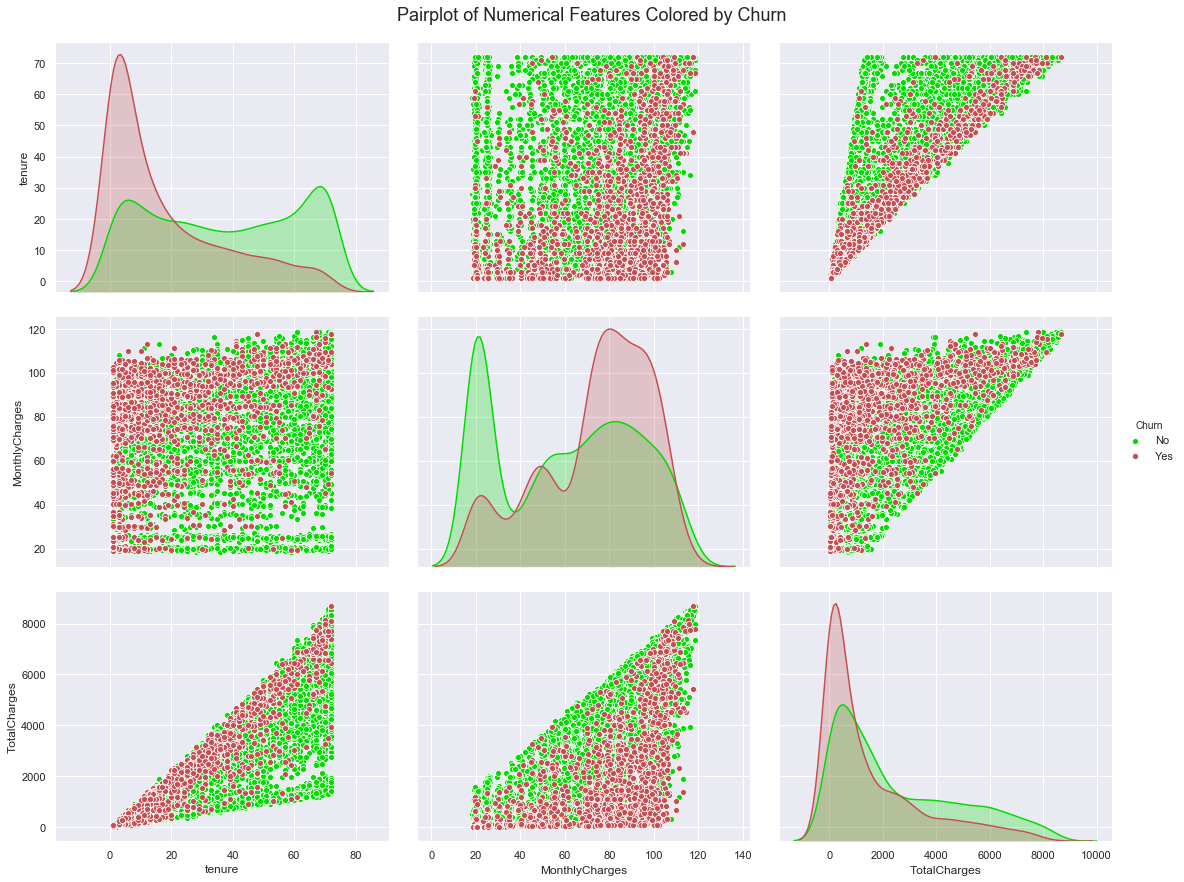

In [18]:
# Plot pairwise relationships between numerical features colored by Churn
g = sns.pairplot(df, hue='Churn', palette=[lightgreen, 'r'], height=4, aspect=1.3);

# Display parent title for figures
g.fig.suptitle('Pairplot of Numerical Features Colored by Churn', y=1.02, fontsize=18);

# Display plot
plt.show()

The diagonal univariate plots show kernel density estimates for our numerical data and summarize their distribution - which tell us customers with low tenure, high monthly charges, and/or high total charges churned the most.

The scatterplots convey the relationship between numerical features, most notably showing a positive, linear relationship between the following pairs of variables:
* TotalCharges and tenure
* TotalCharges and MonthlyCharges

A customer's total charges will compound overtime as he/she continues paying for services - in other words, the longer you're a customer, the more expenses you will incur. A customer's total charges are therefore **dependent** on tenure with the company. 

Similarly, a customer's total charges will increase with their monthly charges. The rate at which a customer's total charges increases is **dependent** on the monthly rate, as it is the product of monthly charges and tenure. The rate at which a customer's total charges compound can change depending on monthly rates but will inherently increase overtime. A customer's total charges are therefore **dependent** on his/her monthly charges.

In the subsequent sections, we'll explore our only pair of **independent** numerical variables, MonthlyCharges and tenure, against a few categorical variables.
***

### 4.3 Scatterplot of Churn & Contract by MonthlyCharges and tenure

As a quick recap, we only have 3 numeric features in the dataset: TotalCharges, MonthlyCharges, and tenure. 

A customer's total charges are **dependent** on monthly charges and tenure. As monthly charges increase, so will the total charges; similarly, as the customer's tenure with the company increases, so does the total charges incurred over the given period.

A customer's monthly charges, however, is **independent** of tenure since it doesn't effect the growth or change of the other. In the telecom industry, the churn rate is typically measured monthly since providers price their services on a monthly basis and experience faster churn rates. Monthly charges are therefore an essential feature to analyze when evaluating churn. Let's analyze clusters of churn between MonthlyCharges and tenure to uncover some hidden insights in our data.

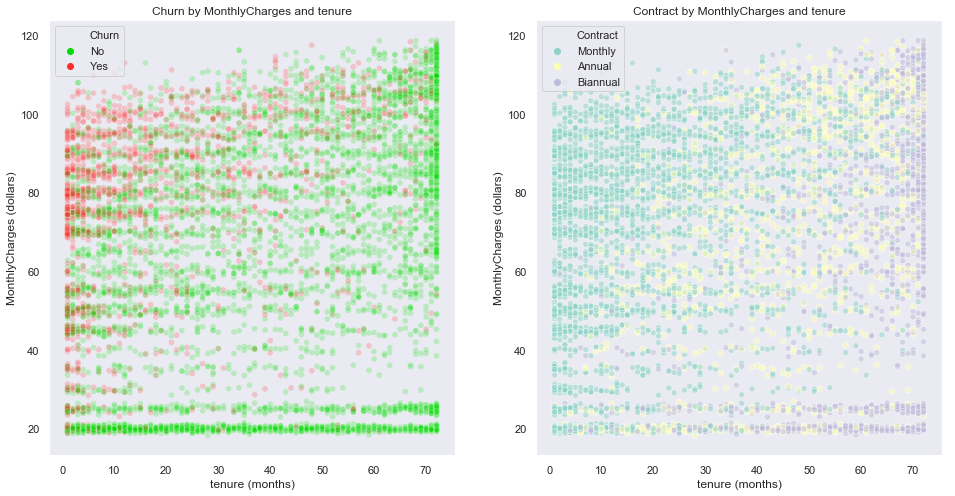

In [19]:
# Draw figure 
plt.figure(figsize=(16, 8));

# Scatterplot of Churn by MonthlyCharges and tenure 
plt.subplot(121);
sns.scatterplot(x='tenure', y='MonthlyCharges', hue='Churn', palette=[lightgreen, red], alpha=0.20, data=df);
plt.xlabel('tenure (months)');
plt.ylabel('MonthlyCharges (dollars)');
plt.title('Churn by MonthlyCharges and tenure');
plt.grid(False)

# Scatterplot of Contract by MonthlyCharges and tenure
plt.subplot(122);
sns.scatterplot(x='tenure', y='MonthlyCharges', hue='Contract', palette='Set3', alpha=0.50, data=df);
plt.xlabel('tenure (months)');
plt.ylabel('MonthlyCharges (dollars)');
plt.title('Contract by MonthlyCharges and tenure');
plt.grid(False)

# Display plot
plt.show()

The scatterplot to the left visualizes **churn** by monthly charges and tenure with transparency to accentuate clusters of records. The scatterplot to the right visualizes **contract types** by monthly charges and tenure. Churn and Contract are represented on two different plots to clearly identify clusters and trends for each variable.

The scatterplots above convey the following information:
* **Cluster 1:** Customers that pay less than 35/mo tend to not churn for up to 70 months and sign longer contracts as their tenure increases.
* **Cluster 2:** Customers that pay more than 70/mo with less than 10 months of tenure have monthly contracts and tend to churn.
* **Cluster 3:** Customers with more than 60 months of tenure tend to not churn and sign biannual contracts that incur the highest monthly charges.

In the subseqeuent sections, we'll take an in-depth look at these clusters and interpret what they mean in terms of consumer behavior.
***

### 4.4 Cluster 1 Analysis
Customers that pay less than 35/mo tend to not churn for up to 70 months and sign longer contracts as their tenure increases.

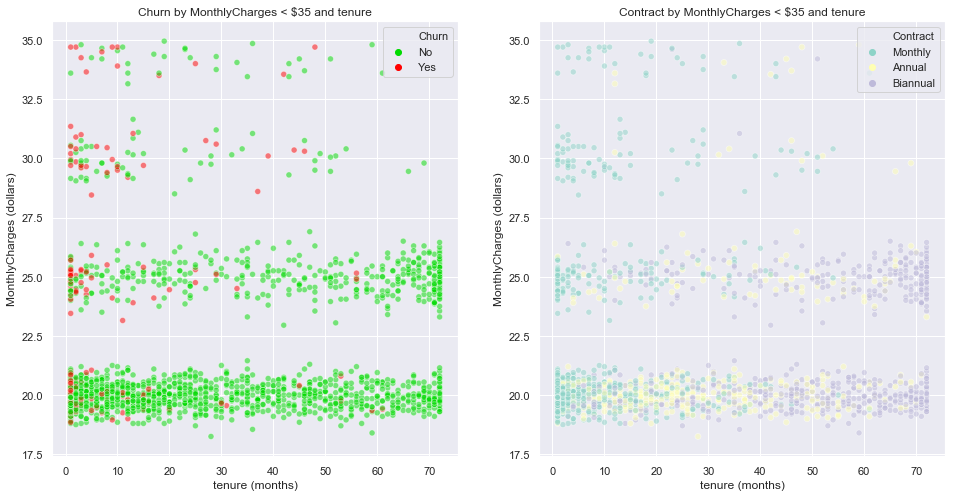


Churn rate for customers paying less than $35/month:
89.1% 	did NOT churn
10.9% 	churned


In [20]:
# ---------DIAGRAM 1--------- #
# Dataframe of MonthlyCharges less than $35
df_cluster1 = df[df.MonthlyCharges < 35]

# Draw figure to render subsequent plots
plt.figure(figsize=(16, 8));

# Scatterplot of records with MonthlyCharges less than $35
plt.subplot(121);
sns.scatterplot(x='tenure', y='MonthlyCharges', hue='Churn', palette=[lightgreen, 'red'], alpha=0.50, data=df_cluster1);
plt.xlabel('tenure (months)');
plt.ylabel('MonthlyCharges (dollars)');
plt.title('Churn by MonthlyCharges < $35 and tenure');

# ---------DIAGRAM 2--------- #
# Scatterplot of records with MonthlyCharges less than $35
plt.subplot(122);
sns.scatterplot(x='tenure', y='MonthlyCharges', hue='Contract', hue_order=['Monthly', 'Annual', 'Biannual'], 
                palette='Set3', alpha=0.50, data=df_cluster1);
plt.xlabel('tenure (months)');
plt.ylabel('MonthlyCharges (dollars)');
plt.title('Contract by MonthlyCharges < $35 and tenure');

# Display plot
plt.show()

# ---------STATISTICS--------- #
# Calculate churn rate for MonthlyCharges < $35
df_mo35 = df_cluster1.groupby('Churn').size()
no_mo35 = df_mo35[0]
yes_mo35 = df_mo35[1]
ret_mo35 = no_mo35 / (no_mo35 + yes_mo35)
churn_mo35 = yes_mo35 / (no_mo35 + yes_mo35)

print('\nChurn rate for customers paying less than $35/month:')
print('{0:.1%} \tdid NOT churn'.format(ret_mo35))
print('{0:.1%} \tchurned'.format(churn_mo35))

At **20/month**, the company retained customers for up to 70 months. Customers with lower tenure incurred these monthly charges more than those with higher tenure. This may suggest the company offered low rates to prospects and existing customers with low tenure to gain and maintain market share, repectively. 

An increasing amount of customers pay **25/month** as tenure increases. This trend suggests retained customers increasingly spend more per month as their tenure increases - this trend can also be seen in diagram [4.3](#4.3-Scatterplot-of-Churn-&-Contract-by-MonthlyCharges-and-tenure) above. Customer satisfaction increases with tenure, as does the willingness to incur higher monthly charges with additional subscriptions. The increasing amount of higher-spending, loyal customers can also be attributed to successful up-sell campaigns that influenced customer segments to purchase additional services. At 20/mo and 25/mo, the number of signed annual and biannual contracts increases with tenure. This trend can be also be attributed to increased satisfaction or successful up-sell campaigns. 
***

### 4.5 Cluster 2 Analysis
Customers that pay more than 70/mo with less than 10 months of tenure have monthly contracts and tend to churn.

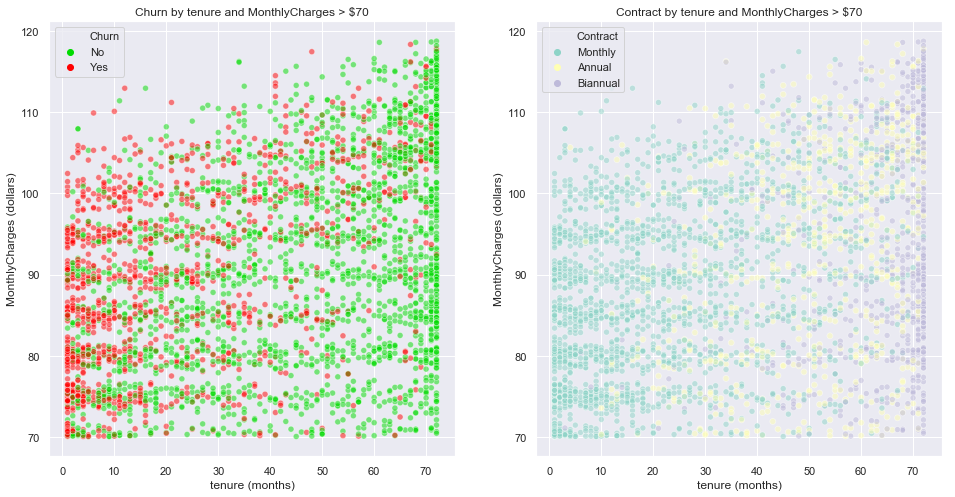


Churn rate for customers paying more than $70/month with less than 10 months of tenure:
69.7% 	churned
30.3% 	did NOT churn

Contract-type percentages for customers paying more than $70/month with less than 10 months that  CHURNED:
99.8% 	had a monthly contract
 0.2% 	had an annual contract
 0.0% 	had a biannual contract


In [21]:
# ---------DIAGRAM 1--------- #
# Dataframe of MonthlyCharges > $70
df_cluster2 = df[df.MonthlyCharges > 70]

# Draw figure to render subsequent plots
plt.figure(figsize=(16, 8));
plt.subplot(121);

# Scatterplot of Churn by tenure and MonthlyCharges greater than $70
sns.scatterplot(x='tenure', y='MonthlyCharges', hue='Churn', hue_order=['No', 'Yes'], 
                palette=[lightgreen, 'red'], alpha=0.50, data=df_cluster2);
plt.xlabel('tenure (months)');
plt.ylabel('MonthlyCharges (dollars)');
plt.title('Churn by tenure and MonthlyCharges > $70');

# ---------DIAGRAM 2--------- #
# Scatterplot of Contract by tenure and MonthlyCharges greater than $70
plt.subplot(122);
sns.scatterplot(x='tenure', y='MonthlyCharges', hue='Contract', palette='Set3', alpha=0.50, data=df_cluster2);
plt.xlabel('tenure (months)');
plt.ylabel('MonthlyCharges (dollars)');
plt.title('Contract by tenure and MonthlyCharges > $70');

# Display plot
plt.show()

# ---------STATISTICS--------- #
# Calculate churn rate for MonthlyCharges > $70 and tenure < 10
df_c2 = df[(df.MonthlyCharges > 70) & (df.tenure < 10)].groupby('Churn').size()
no_mo70 = df_c2[0]
yes_mo70 = df_c2[1]
ret_mo70 = no_mo70 / (no_mo70 + yes_mo70)
churn_mo70 = yes_mo70 / (no_mo70 + yes_mo70)

print('\nChurn rate for customers paying more than $70/month with less than 10 months of tenure:')
print('{0:.1%} \tchurned'.format(churn_mo70))
print('{0:.1%} \tdid NOT churn'.format(ret_mo70))

# Calculate Contract proportions for MonthlyCharges > $70 and tenure < 10
df_con2 = df[(df.MonthlyCharges > 70) & (df.tenure < 10)].groupby(['Contract', 'Churn']).size()

# Retained
monthly_no = df_con2[3]
annual_no = df_con2[0]
biannual_no = df_con2[2]

# Churned
monthly_yes = df_con2[4]
annual_yes = df_con2[1]

# Calculate churn rates
monthYesRate = monthly_yes / (monthly_yes + annual_yes)
annualYesRate = annual_yes / (monthly_yes + annual_yes)

print('\nContract-type percentages for customers paying more than $70/month with less than 10 months that  CHURNED:')
print('{0:.1%} \thad a monthly contract'.format(monthYesRate))
print(' {0:.1%} \thad an annual contract'.format(annualYesRate))
print(' 0.0% \thad a biannual contract')

The scatterplot to the left visualizes the **churn frequency** for customers paying 70 to 118 per month; the scatterplot to the right visualizes **contract types**  for the same customer segment.

70% of customers who paid more than 70/mo with less than 10 months of tenure discontinued their services (churned). This customer segment churned more than any other segment in the company. Almost all of the customers who churned in this segment had monthly contracts. The high monthly payments and flexibility to terminate services sooner incentivized this segment to churn and find better deals with different providers.
***

### 4.6 Cluster 3 Analysis
Customers with more than 60 months of tenure tend to not churn and sign biannual contracts that incur the highest monthly charges.

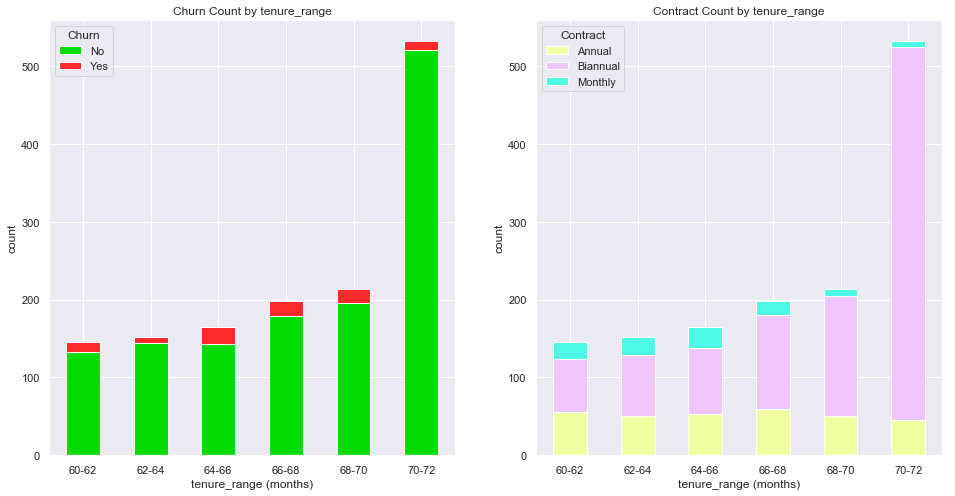

Statistics derived from stacked bar charts above:
Churn rate for customers with more than 60 months of tenure:
93.4% 	did NOT churn
 6.6% 	churned

Contract-type percentages for customers with more than 60 months of tenure:
70.1% 	had biannual contracts
22.2% 	had annual contracts
 7.7% 	had monthly contracts


In [22]:
# Make a dataframe copy to avoid chaining arguments 
import copy
dfCluster3 = copy.deepcopy(df)

# 1-D Series
tenure60 = dfCluster3.loc[dfCluster3.tenure > 60, 'tenure']

# Bin tenure into 2 month intervals
ten_bins = [60, 62, 64, 66, 68, 70, 72]
ten_labels = ['60-62', '62-64', '64-66', '66-68', '68-70', '70-72']
dfCluster3['tenure_range'] = pd.cut(tenure60, ten_bins, labels=ten_labels)

# Instantiate figure to display subplots
fig, axes = plt.subplots(nrows=1, ncols=2)

# ---------DIAGRAM 1--------- #
# Dataframe of tenure > 60
dfCluster3 = dfCluster3[dfCluster3.tenure > 60]

# Pivot table of Churn by tenure ranges 60 to 72
# (Doesn't matter which numerical feature used as values parameter: all 3 num. features return same results)
churn_pt = dfCluster3.pivot_table(index='tenure_range', columns='Churn', values='MonthlyCharges', aggfunc='count')

# Plot a stacked bar chart of Churn by tenure ranges
churn_stacked = churn_pt.plot(kind='bar', stacked=True, rot=0, color=[lightgreen, red], figsize=(16, 8), ax=axes[0]);
axes[0].set_xlabel('tenure_range (months)');
axes[0].set_ylabel('count');
axes[0].set_title('Churn Count by tenure_range');

# ---------DIAGRAM 2--------- #
# Pivot table of Contract by tenure ranges 60 to 72
# (Doesn't matter which numerical feature used as values parameter: all 3 num. features return same results)
contract_pt = dfCluster3.pivot_table(index='tenure_range', columns='Contract', values='MonthlyCharges', aggfunc='count')

# Plot a stacked bar chart of Contract by tenure ranges
contract_stacked = contract_pt.plot(kind='bar', stacked=True, rot=0, color=['#f1ffa3', '#efc6ff', '#4ff9e8'], ax=axes[1]);
axes[1].set_xlabel('tenure_range (months)');
axes[1].set_ylabel('count');
axes[1].set_title('Contract Count by tenure_range');

# Display plot
plt.show()

# ---------STATISTICS--------- #
# Calculate churn rate for tenure > 60
df_c3 = dfCluster3.groupby('Churn').size()
ret_c3 = df_c3[0]
churn_c3 = df_c3[1]

retRatec3 = ret_c3 / (ret_c3 + churn_c3)
churnRatec3 = churn_c3 / (ret_c3 + churn_c3)

print('Statistics derived from stacked bar charts above:')
print('Churn rate for customers with more than 60 months of tenure:')
print('{0:.1%} \tdid NOT churn'.format(retRatec3))
print(' {0:.1%} \tchurned'.format(churnRatec3))

# Calculate contract proportions for tenure > 60
df_con3 = dfCluster3.groupby('Contract').size()

monthly3 = df_con3[2]
annual3 = df_con3[0]
biannual3 = df_con3[1]

monthlyRate3 = monthly3 / (monthly3 + annual3 + biannual3)
annualRate3 = annual3 / (monthly3 + annual3 + biannual3)
biannualRate3 = biannual3 / (monthly3 + annual3 + biannual3)

print('\nContract-type percentages for customers with more than 60 months of tenure:')
print('{0:.1%} \thad biannual contracts'.format(biannualRate3))
print('{0:.1%} \thad annual contracts'.format(annualRate3))
print(' {0:.1%} \thad monthly contracts'.format(monthlyRate3))

The diagram to the left visualizes **churn proportions** in the top 16% of tenure in two month intervals. The diagram to the right visualizes the proportion of different **contract types** for the same percentile. 

93% of customers with more than 60 months of tenure continued using the company's services. This segment **churned the least** out of any other segment and are the company's most loyal customers given their high tenure and high retention rate. The number of churned customers with monthly contracts as tenure increases, while the number of biannual contracts increases with tenure, especially during 70 to 72 months.

### 4.7 Churn Rate by Demographics

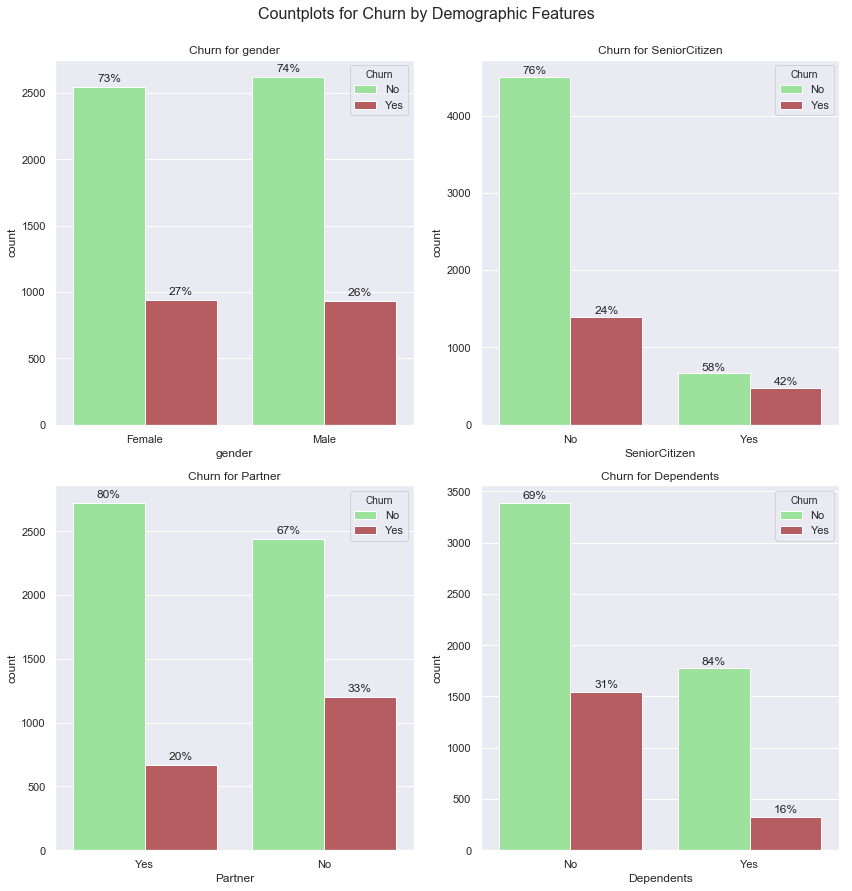

In [23]:
# Categorical demographic features
demo_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']

# Instantiate figure to render plots on
fig8 = plt.figure(figsize=(12, 12))

# Figure title
fig8.suptitle('Countplots for Churn by Demographic Features', y=1.03, fontsize=16);
    
# Loop through demographic features and draw plots
for col, i in zip(demo_cols, range(1, len(demo_cols) + 1)):
    plt.subplot(2, 2, i);
    ax = sns.countplot(x=col, hue='Churn', palette=['lightgreen', 'r'], data=df);

    # Display percentages above each bar so that the sum per value equals 100%
    bars = ax.patches
    half = int(len(bars)/2)
    left_bars = bars[:half]
    right_bars = bars[half:]

    for left, right in zip(left_bars, right_bars):
        height_l = left.get_height()
        height_r = right.get_height()
        total = height_l + height_r

        ax.text(left.get_x() + left.get_width()/2., height_l + 40, '{0:.0%}'.format(height_l/total), ha="center")
        ax.text(right.get_x() + right.get_width()/2., height_r + 40, '{0:.0%}'.format(height_r/total), ha="center")

    # Set title
    plt.title('Churn for ' + col);
    
# Display plot
plt.tight_layout()
plt.show()

**Notable observations for churn in demographic features:**

**Gender**
* Males and females have similar churn rates.
* There are almost the same amount of males and females in our samples.

**SeniorCitizen**
* The majority of customers in our samples are not senior citizens who did not churn.
* Senior citizen customers have almost double the churn rate of those who aren't senior citizens - partially attributed to their smaller sample size.
* Senior citizen customers account for the highest churn rate out of all demographic features.

**Partner**
* Customers without a partner had a slightly higher churn rate than those with a partner.
* The household income for customers without a partner was possibly lower than those with a partner, causing independent customers to be more sensitive to increases in monthly rates. Their sensitivity to pricing was likely a key factor for their higher churn rate.
* There were slightly more customers without a partner in our samples.

**Dependents**
* The churn rate for customers with dependents is very low - the lowest out of all demographic features.
* Customers with dependents may have paid for a family plan/bundle at a lower monthly rate for a longer contractual term which elicit higher retention rates - as shown in figures [4.3](#4.3-Scatterplot-of-Churn-&-Contract-by-MonthlyCharges-and-tenure) and [4.4](#4.4-Cluster-1-Analysis).
* The majority of customers in our samples did not have dependents.

***

### 4.8 Churn Rate by Services

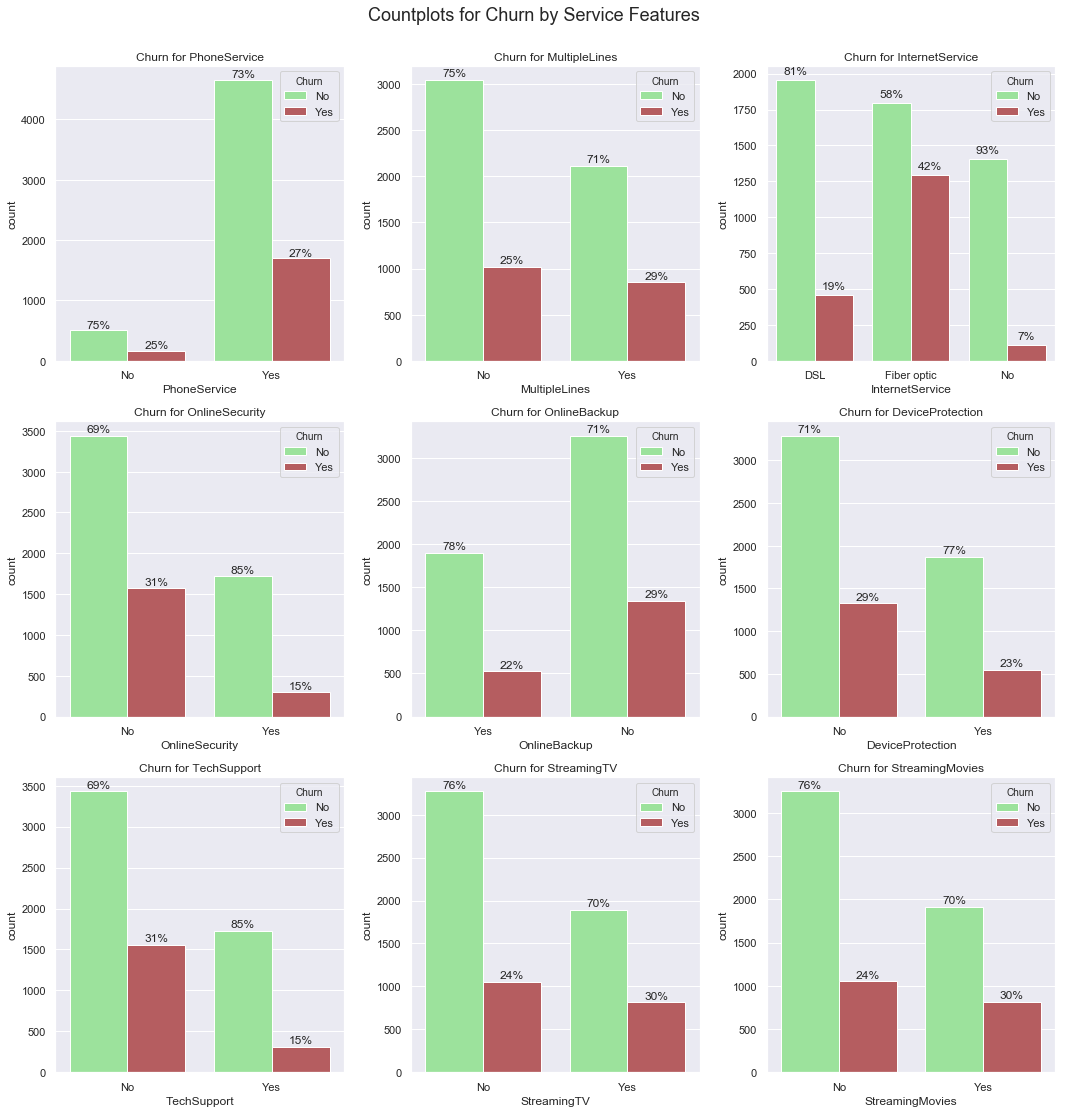

In [24]:
# Categorical service features 
serv_cols = [
    'PhoneService',
    'MultipleLines',
    'InternetService',
    'OnlineSecurity',
    'OnlineBackup',
    'DeviceProtection',
    'TechSupport',
    'StreamingTV',
    'StreamingMovies'
]

# Instantiate figure to render plots on
fig9 = plt.figure(figsize=(15, 15))

# Figure title
fig9.suptitle('Countplots for Churn by Service Features', y=1.03, fontsize=18);
    
# Loop through service features and draw plots
for col, i in zip(serv_cols, range(1, len(serv_cols) + 1)):
    plt.subplot(3, 3, i);
    ax = sns.countplot(x=col, hue='Churn', palette=['lightgreen', 'r'], data=df);
    
    # Display percentages above each bar so that the sum per value equals 100%
    bars = ax.patches
    half = int(len(bars)/2)
    left_bars = bars[:half]
    right_bars = bars[half:]

    for left, right in zip(left_bars, right_bars):
        height_l = left.get_height()
        height_r = right.get_height()
        total = height_l + height_r

        ax.text(left.get_x() + left.get_width()/2., height_l + 40, '{0:.0%}'.format(height_l/total), ha="center")
        ax.text(right.get_x() + right.get_width()/2., height_r + 40, '{0:.0%}'.format(height_r/total), ha="center")
    
    # Set title
    plt.title('Churn for ' + col);
    
# Display plot
plt.tight_layout()
plt.show()

**Notable observations for churn in service features:**

**PhoneService**
* Almost all customers pay for phone services and the majority of them did not churn.

**MultipleLines**
* Customers with and without multiple lines have similar churn rates.
* There was a similar amount of customers with and without multiple lines in our samples.

**InternetService**
* Customers without Internet service had the lowest churn rate out all service features whereas those with fiber optic had the highest churn rate out of all service features.
* Fiber optic costs more per month than DSL, and according to figures [4.4](#4.4-Scatterplot-of-Churn-&-Contract-by-MonthlyCharges-and-tenure) and [4.5](#4.5-Cluster-1-Analysis), higher monthly charges elicit higher churn rates.

**OnlineSecurity** 
* The churn rate for those without online security was double the rate of those with online security.
* More customers in our samples did not have online security (malware protection).

**OnlineBackup**
* The churn rate was similar for those with and without online backup; more customers did not have online backup.

**DeviceProtection**
* The churn rate was similar for those with and without device protection; more customers did not have device protection.

**TechSupport**
* The churn rate for those without tech support was double the rate of those with tech support.
* More customers in our samples did not have tech support.

**StreamingTV**
* The churn rate was similar for those with and without streaming TV; more customers did not have streaming TV.

**StreamingMovies**
* The churn rate was similar for those with and without streaming movies; more customers did not have streaming movies.

***

### 4.9 Churn Rate by Account Information

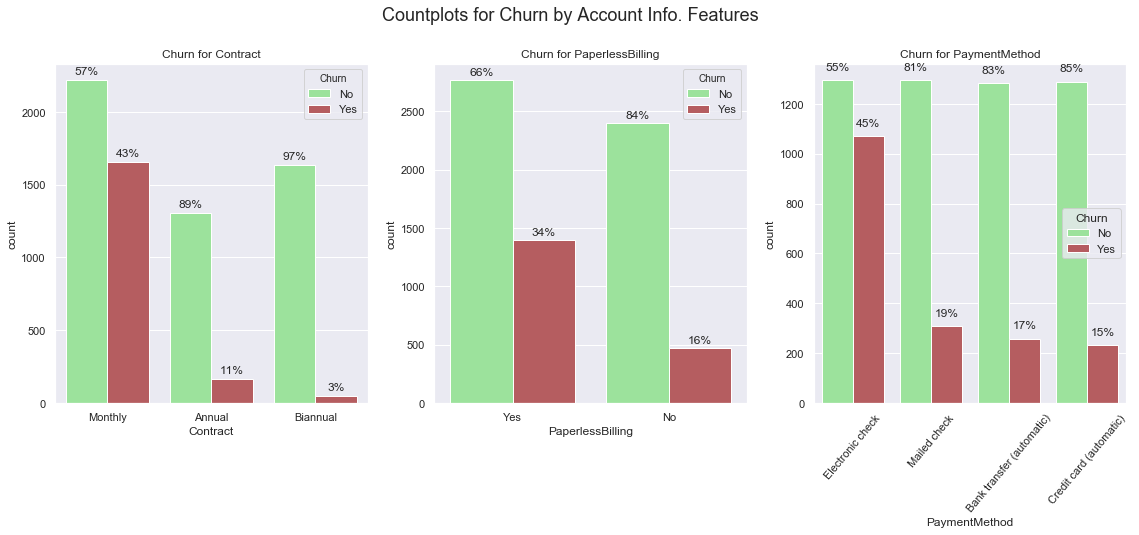

In [25]:
# Categorical account info features
acct_cols = [
    'Contract',
    'PaperlessBilling',
    'PaymentMethod'
]

# Instantiate figure to render plots on
fig10 = plt.figure(figsize=(16, 7))

# Figure title
fig10.suptitle('Countplots for Churn by Account Info. Features', y=1.06, fontsize=18);
    
# Loop through account info features and draw plots
for col, i in zip(acct_cols, range(1, len(acct_cols) + 1)):
    plt.subplot(1, 3, i);
    ax = sns.countplot(x=col, hue='Churn', palette=['lightgreen', 'r'], data=df);
    
    # Display percentages above each bar so that the sum per value equals 100%
    bars = ax.patches
    half = int(len(bars)/2)
    left_bars = bars[:half]
    right_bars = bars[half:]

    for left, right in zip(left_bars, right_bars):
        height_l = left.get_height()
        height_r = right.get_height()
        total = height_l + height_r

        ax.text(left.get_x() + left.get_width()/2., height_l + 40, '{0:.0%}'.format(height_l/total), ha="center")
        ax.text(right.get_x() + right.get_width()/2., height_r + 40, '{0:.0%}'.format(height_r/total), ha="center")
    
    if col == 'PaymentMethod':
        plt.xticks(rotation=50);
        plt.legend(['No', 'Yes'], loc='center right', title='Churn');
        
    # Set title
    plt.title('Churn for ' + col);
    
# Display plot
plt.tight_layout()
plt.show()

**Notable observations for churn in account information features:**

**Contract**
* The majority of customers in our samples had monthly contracts and churned significantly more than those with annual and biannual contracts.
* Customers with biannual contracts had the lowest churn rate and highest retention rate out of all account information features.
* Customers with annual contracts also had a significantly low churn rate and high retention rate.

**PaperlessBilling**
* The churn rate for those with paperless billing was double the rate of those without paperless billing.
* More customers in our samples opted in for paperless billing.

**PaymentMethod**
* The majority of customers in our samples made payments via electronic check and churned significantly more than those with a different payment method.
* Customers who paid via electronic check had the highest churn rate out of all account information features.
* Those who paid with any other payment method had similar churn rates.

***

### 4.10 Notable Churn Rates
(for categorical features)

1. **SeniorCitizen**: majority of customers in our samples are not senior citizens who did not churn.
2. **Dependents**: the churn rate for those with dependents is the lowest out of all demographic features.
3. **PhoneService**: almost all customers pay for phone services and majority of them did not churn.
4. **InternetService**: those without internet service had the lowest churn rate whereas those with fiber optic had the highest churn rate.
5. **OnlineSecurity**: the churn rate for those without online security was double the rate of those with online security.
6. **TechSupport**: the churn rate for those without tech support was double the rate of those with tech support.
7. **Contract**: customers with monthly contracts churned significantly more than those with annual and biannual contracts.
8. **PaperlessBilling**: the churn rate for those with paperless billing was double the rate of those without paperless billing.
9. **PaymentMethod**: customers who paid via electronic check had the highest churn rate out of all account information features.

***

## 5. Preprocessing

### 5.1 Creating Dummy Variables

Since scikit-learn does not accept categorical features to model with, we must encode the categorical features numerically. 

In [26]:
# Create dummy variables
df_cat_encoded = pd.get_dummies(df, drop_first=True)
df_cat_encoded.head()

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_Yes,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_Fiber optic,...,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_Biannual,Contract_Monthly,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,1,29.85,29.85,0,0,1,0,0,0,0,...,0,0,0,0,1,1,0,1,0,0
5575-GNVDE,34,56.95,1889.50,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3668-QPYBK,2,53.85,108.15,1,0,0,0,1,0,0,...,0,0,0,0,1,1,0,0,1,1
7795-CFOCW,45,42.30,1840.75,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
9237-HQITU,2,70.70,151.65,0,0,0,0,1,0,1,...,0,0,0,0,1,1,0,1,0,1


The table above shows the first 5 records of our numerically encoded dataset.

### 5.2 Heatmap of Correlation Coefficients

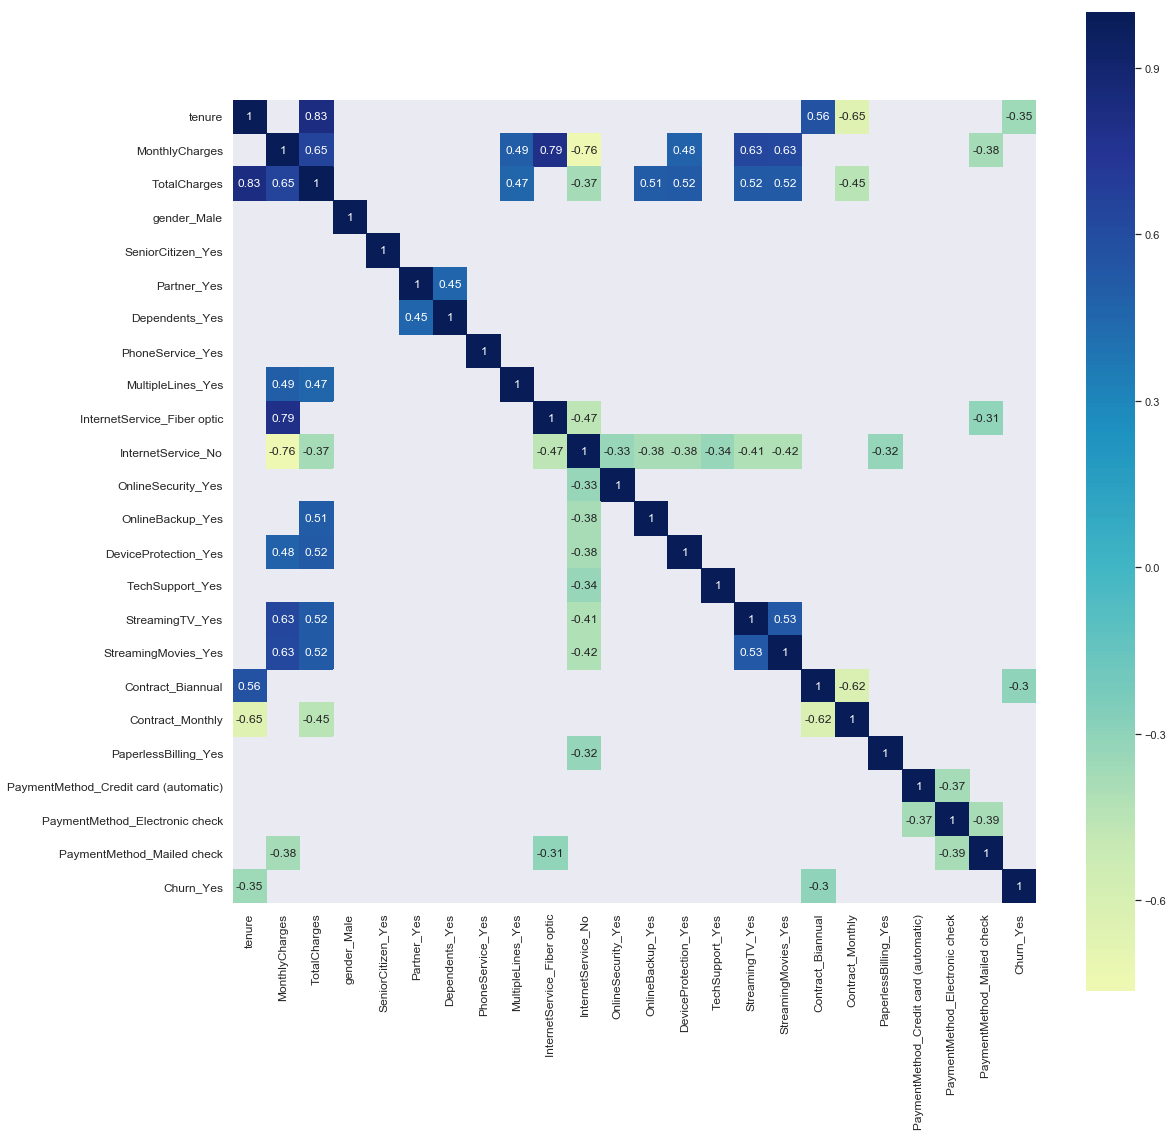

In [27]:
# Instantiate a mask for the weak correlations
weak_corr = ((0.45 > df_cat_encoded.corr()) & (df_cat_encoded.corr() > -0.30))

# Instantiate figure to render subsequent plot on
plt.figure(figsize=(18, 18))

# Draw heatmap
sns.heatmap(df_cat_encoded.corr(), 
            xticklabels=df_cat_encoded.corr().columns, 
            yticklabels=df_cat_encoded.corr().columns,
            center=0,
            cmap="YlGnBu",
            square=True,
            annot=True,
            mask=weak_corr);

# Set x and y tick (feature name) font sizes
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Display plot
plt.show()

* The heatmap above computes the pairwise correlation between each feature in the dataset. 
* Only the values with strong correlation (upper 50th correlation percentile) are shown above: a coefficient between 0.45 to 0.90 is considered a strong, **positive** correlation and a coefficient between -0.30 to -0.60 is considered a strong, **negative** correlation. 
* The following features have no strong correlation with any other feature: 
    * SeniorCitizen_Yes, PhoneService_Yes, and gender_Male. 
    * Despite their lack of correlation with other features, the EDA shows SeniorCitizen_Yes and PhoneService_Yes are strong predictors of churn (see countplots [4.7](#4.7-Churn-Rate-by-Demographics) and [4.8](#4.8-Churn-Rate-by-Services) above). 
    * gender_Male, however, has no predictive power for model building and will be excluded from the input features. 
    
Let's start building our models!

## 6. Model Building

In [30]:
from sklearn.model_selection import train_test_split

# Create features and target arrays
X = df_cat_encoded.drop(['Churn_Yes', 'gender_Male'], axis=1).values
y = df_cat_encoded.Churn_Yes.values

# Create training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

To create our features array, we drop the Churn feature since that is our target variable and we are trying to predict its labels. From our EDA, we determined that a customer's gender likely has no effect on their propensity to churn since it wasn't strongly correlated with other features and had no notable differences in churn rates between genders.
***

### 6.1 Intuition Behind Evaluation Metric

Given our imbalanced classification problem where the positive class, "no-churn", greatly outnumbers the negative class, "churn", accuracy is not a good measure for assessing model performance because the model will biasedly predict more records as the majority class and convey a misleading evaluation.

Precision and recall are more appropriate metrics to use since they don't make use of the overwhelming, negative class ("no-churn") predictions and instead focus on identifying the positive "churn" cases. For our model evaluation, we will analyze precision, recall, f1-score, AUCPR (area under precision-recall curve), and AUC (area under ROC curve).

Given our particular business scenario, we will closely analyze the **recall** metric. Recall evaluates the ability of a model to find all the relevant cases within a dataset; it is the number of *true positives* divided by the sum of *true positives* and *false negatives*. In the scope of this project, true positives are correctly identified "churn" customers, and **false negatives are individuals the model labels as "retained" who actually "churned"**. 

<img src="images/recall_formula.png" alt="Recall Formula" title="Recall" />

A false negative is most problematic in our scenario because we misclassify a group of churned customers and miss an opportunity to market towards a niche group in a retention program that is, on average, a fraction of the cost of an acquisition program. By minimizing the number of false negatives, we can maximize our recall value and market towards the largest group of customers predicted to churn.

We will also take **precision** into consideration when evaluating performance, which is the model's ability to identify the relevant "churn" data points. A model with high recall and mid-to-low precision will account for a high percentage of correctly predicted "churn" customers and a low percentage of retained customers that were misclassified as "churned".

The main tradeoff here are the additional marketing dollars spent on retained customers that should ideally be spent on customers likely to churn - this, however, isn't entirely undesirable since the marketing dollars allocated towards "retained" customers will add to their longevity with the company.
***

### 6.2 XGBoost

#### Define functions

In [355]:
# Define function to plot precision-recall curve
def pr_curve(ytest, pred):
    """Plot the precision-recall curve."""
    # Calculate precision-recall curve
    precision, recall, thresholds = precision_recall_curve(ytest, pred)

    # Plot no skill
    plt.figure(figsize=(7, 7))
    plt.plot([0, 1], [0.5, 0.5], linestyle='--')

    # Plot the precision-recall curve
    plt.plot(recall, precision, marker='.')

    # Set title and axes labels
    plt.title('Precision-Recall Curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')

    # Set axes interval range
    plt.ylim([0, 1.05])
    plt.xlim([0, 1.05])
    plt.show()

# Define function to compute metrics
def metrics(ytest, pred, evaldict):
    """Compute metrics."""
    print('Precision: {0:.3f}'.format(precision_score(ytest, pred)))
    print('Recall:    {0:.3f}'.format(recall_score(ytest, pred)))
    print('f1-score:  {0:.3f}'.format(f1_score(ytest, pred)))
    for i in evaldict.values():
        print('AUCPR:     {0:.3f}'.format(max(i['aucpr'])))
        print('AUC:       {0:.3f}'.format(max(i['auc'])))

#### Building a baseline model

In order to get an idea of the range of precision and recall we would like our model to surpass, we are going to build a baseline model and save its score for later. This score is what we can achieve with no tuning. 

In [360]:
import xgboost as xgb
from sklearn.metrics import precision_score, recall_score, f1_score, precision_recall_curve
import time

# Load data into DMatrices (optimized for xgb algorithm)
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Define (baseline) parameters
params_base = {
    'verbosity': 0,
    'objective': 'binary:logistic',
    'eval_metric': ['aucpr', 'auc'],
    'seed': 0
}

# Set number of boosting rounds
num_round = 10

# Specify validations set to watch performance
evallist = [(dtest, 'test')]

# Initialize dictionary to store testing evaluation results
bst1_evals = {}

# Train model
bst1 = %time xgb.train(params=params_base, dtrain=dtrain, num_boost_round=num_round, evals=evallist, evals_result=bst1_evals, early_stopping_rounds=3, verbose_eval=0)
print('Best iteration at {} rounds.'.format(bst1.best_iteration))

# Make preditions (threshold set to 0.5)
bst1_ypred = (bst1.predict(dtest, ntree_limit=bst1.best_ntree_limit) > 0.5).astype('int')

# Print metrics
metrics(y_test, bst1_ypred, bst1_evals)

CPU times: user 112 ms, sys: 1.83 ms, total: 114 ms
Wall time: 117 ms
Best iteration at 5 rounds.
Precision: 0.648
Recall:    0.508
f1-score:  0.569
AUCPR:     0.639
AUC:       0.837


With the model's parameters set to their default values and no tuning, we get the baseline metric scores listed above. Let's tweak a few parameters and potentially increase our baseline scores.

#### XGBoost Minimal Tuning

In [385]:
# Balance the positive and negative weights and 
# assign it to the scale_pos_weight parameter

train_labels = dtrain.get_label()
ratio = float(np.sum(train_labels == 0)) / np.sum(train_labels == 1)
print('Value for scale_pos_weight: {:.2f}'.format(ratio))

Value for scale_pos_weight: 2.76


According to the XGBoost documentation, setting the **scale_pos_weight** parameter to the ratio of negative to positive classes will help equalize the class imbalance and require AUC for evaluation. It's acceptable to now use AUC for model evaluation since the ROC curve is less weighted towards the true negatives thereby providing a less biased representation of the model's performance.

In [387]:
# Set hyperparameters
params = {
    'max_depth':        5,        
    'min_child_weight': 10,       
    'gamma':            1,        
    'subsample':        1,        
    'colsample_bytree': 1,        
    'learning_rate':    0.3,      
    'n_estimators':     500,
    'scale_pos_weight': 2.76,     
    'verbosity':        0,
    'objective': 'binary:logistic',
    'eval_metric': ['aucpr', 'auc'],          
    'seed': 0
}

# Load data into DMatrices (optimized for xgb algorithm)
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Specify validations set to watch performance
evallist = [(dtest, 'test')]

# Number of boosting rounds 
num_boost_round = 999

# Initialize dictionary to store testing evaluation results
bst2_evals = {}

# Train model
bst2 = %time xgb.train(params, dtrain, num_boost_round=num_boost_round, evals=evallist, evals_result=bst2_evals, early_stopping_rounds=10, verbose_eval=0)
print('Best iteration at {} rounds.'.format(bst2.best_iteration))

# Make predictions (theshold set to 0.5)
bst2_ypred = (bst2.predict(dtest, ntree_limit=bst2.best_ntree_limit) > 0.5).astype('int')

# Print metrics 
metrics(y_test, bst2_ypred, bst2_evals)

CPU times: user 186 ms, sys: 2.71 ms, total: 189 ms
Wall time: 194 ms
Best iteration at 7 rounds.
Precision: 0.512
Recall:    0.807
f1-score:  0.627
AUCPR:     0.646
AUC:       0.839


The parameter tweaks improved our model's performance across all metrics, especially for recall. Let's compare the baseline model to the minimally tuned model and further analyze the changes.

In [388]:
print('Baseline model:')
metrics(y_test, bst1_ypred, bst1_evals)

print('\nModel w/ minimal tuning:')
metrics(y_test, bst2_ypred, bst2_evals)

Baseline model:
Precision: 0.648
Recall:    0.508
f1-score:  0.569
AUCPR:     0.639
AUC:       0.837

Model w/ minimal tuning:
Precision: 0.512
Recall:    0.807
f1-score:  0.627
AUCPR:     0.646
AUC:       0.839


Tweaking only a few parameters increased the model's overall performance at the expense of its precision - mainly attributed to reweighting the positive class. 

The baseline model classified imbalanced samples - where the negative class was significantly larger than the positive class. The second, minimally-tuned model classified the *same* samples with about 3 times more weight on the positive class to equalize the imbalance and unbiasedly predict data points. 

As a result, the tuned classifier's ability to find all positive samples increases - represented by an increase in recall - at the expense of labeling more negative samples as positive - represented by a decrease in precision. The tradeoff of a lower precision isn't entirely undesireable here since the f1-score increased - which is the harmonic mean of precision and recall. The f1-score gives equal weight to both measures and is useful to create a classification model with an optimal balance of precision and recall. 

We are interested in a higher recall score, which may not necessarily be the optimal balance of precision and recall - but given the increase in recall and f1-score with tuning, we know that finding optimal parameters may increase both scores and increase our model's predictive power. Let's use cross validation and gridsearch to find the optimal parameters for our model. 

#### Parameters max_depth, min_child_weight, and gamma
These parameters add contraints on the architecture of the trees and directly control complexity to resolve overfitting. We tune them together to find a good trade-off between model bias and variance.

In [545]:
from sklearn.model_selection import GridSearchCV

# Tune parameters that directly control model complexity
params_grid = {
    'max_depth':        np.arange(3, 11, 1),
    'min_child_weight': np.arange(4, 16, 1),
    'gamma':            np.arange(1, 6, 1),
    'subsample':        [1],        
    'colsample_bytree': [1],        
    'learning_rate':    [0.3],      
    'n_estimators':     [500],
    'scale_pos_weight': [2.76],        
    'verbosity':        [0],
    'objective':        ['binary:logistic'],
    'eval_metric':      ['auc']     #according to xgboost documentation, after balancing weights, use AUC for evaluation
}

bst1_grid = GridSearchCV(
    estimator=xgb.XGBClassifier(seed=42),
    param_grid=params_grid,
    scoring='roc_auc',      
    cv=3,
    verbose=0
)

%time bst1_grid.fit(X_train, y_train)

print('Best AUC score: {0:.3f}'.format(bst1_grid.best_score_))
print('Best parameters:')
for key, val in bst1_grid.best_params_.items():
    print('\t{}: {}'.format(key, val))

CPU times: user 1h 9min 11s, sys: 19.8 s, total: 1h 9min 31s
Wall time: 1h 10min 27s
Best AUC score: 0.846
Best parameters:
	colsample_bytree: 1
	eval_metric: auc
	gamma: 5
	learning_rate: 0.3
	max_depth: 3
	min_child_weight: 13
	n_estimators: 500
	objective: binary:logistic
	scale_pos_weight: 2.76
	subsample: 1
	verbosity: 0


After tuning max_depth, min_child_weight, and gamma, we get an **improved AUC score of 0.846** - an improvement of 0.007 - with the following tested optimal parameters:
* **max_depth: 3**
* **min_child_weight: 13**
* **gamma: 5**

Let's update our tested parameters with the aforementioned values and tune another set of parameters that control overfitting.

*(The run time for testing these parameters was 1h 10min)*

#### Parameters subsample and colsample_bytree
These parameters control the sampling of the dataset that is done at each boosting round and add randomness to make training robust to noise to control overfitting. 

In [550]:
# Tune parameters that add randomness and make training robust to noise.
params_grid = {
    'max_depth':        [3],
    'min_child_weight': [13],
    'gamma':            [5],
    'subsample':        np.arange(.1, 1.1, .1),        
    'colsample_bytree': np.arange(.1, 1.1, .1),        
    'learning_rate':    [0.3],      
    'n_estimators':     [500],
    'scale_pos_weight': [2.76],        
    'verbosity':        [0],
    'objective':        ['binary:logistic'],
    'eval_metric':      ['auc']     
}

bst2_grid = GridSearchCV(
    estimator=xgb.XGBClassifier(seed=42),
    param_grid=params_grid,
    scoring='roc_auc',      
    cv=3,
    verbose=0
)

%time bst2_grid.fit(X_train, y_train)

print('Best AUC score: {0:.3f}'.format(bst2_grid.best_score_))
print('Best parameters:')
for key, val in bst2_grid.best_params_.items():
    print('\t{}: {}'.format(key, val))

CPU times: user 6min 58s, sys: 2.04 s, total: 7min
Wall time: 7min 6s
Best AUC score: 0.848
Best parameters:
	colsample_bytree: 0.1
	eval_metric: auc
	gamma: 5
	learning_rate: 0.3
	max_depth: 3
	min_child_weight: 13
	n_estimators: 500
	objective: binary:logistic
	scale_pos_weight: 2.76
	subsample: 1.0
	verbosity: 0


After tuning subsample and colsample_bytree, we get an **improved AUC score of 0.848** - an improvement of 0.002 - with the following tested optimal parameters:
* **subsample: 1.0**
* **colsample_bytree: 0.1**

Let's update our tested parameters with the aforementioned values and tune another set of parameters that control overfitting.

*(The run time for testing these parameters was 7min)*

#### Parameters learning_rate, n_estimators, and num_boost_round

In [559]:
# Updated parameter list
params = {
    'max_depth':        3,
    'min_child_weight': 13,
    'gamma':            5,
    'subsample':        1,        
    'colsample_bytree': 0.1,        
    'learning_rate':    0.3,      # testing
    'n_estimators':     500,      # testing
    'scale_pos_weight': 2.76,        
    'verbosity':        0,
    'objective':        'binary:logistic',
    'eval_metric':      ['aucpr', 'auc']     
}

In [580]:
for eta in [0.005, 0.01, 0.5, 0.1, 0.2, 0.3]:
    print('CV with learning_rate={}'.format(eta))
    
    # Update our params 
    params['learning_rate'] = eta
    
    # Run and time CV
    cv_results = %time xgb.cv(params, dtrain, num_boost_round=3000, seed=42, metrics=['auc', 'aucpr'], early_stopping_rounds=10, callbacks=[xgb.callback.early_stop(3)])
    
    
    # Update best score
    mean_auc = cv_results['test-auc-mean'].max()
    mean_aucpr = cv_results['test-aucpr-mean'].max()
    boost_rounds = cv_results['test-auc-mean'].idxmax()
    print('\tAUC {:.4f}, AUCPR {:.4f} for {} rounds.\n'.format(mean_auc, mean_aucpr, boost_rounds))
    print('------------------')


CV with learning_rate=0.005
Multiple eval metrics have been passed: 'test-aucpr' will be used for early stopping.

Will train until test-aucpr hasn't improved in 3 rounds.
Stopping. Best iteration:
[16]	train-auc:0.831578+0.0104189	train-aucpr:0.641661+0.0125974	test-auc:0.82436+0.0165574	test-aucpr:0.634978+0.00986193

CPU times: user 269 ms, sys: 5.47 ms, total: 275 ms
Wall time: 278 ms
	AUC 0.8244, AUCPR 0.6350 for 16 rounds.

------------------
CV with learning_rate=0.01
Multiple eval metrics have been passed: 'test-aucpr' will be used for early stopping.

Will train until test-aucpr hasn't improved in 3 rounds.
Stopping. Best iteration:
[16]	train-auc:0.831823+0.0102938	train-aucpr:0.641994+0.0123953	test-auc:0.824636+0.0164566	test-aucpr:0.635436+0.00969136

CPU times: user 257 ms, sys: 3.2 ms, total: 260 ms
Wall time: 262 ms
	AUC 0.8246, AUCPR 0.6354 for 16 rounds.

------------------
CV with learning_rate=0.5
Multiple eval metrics have been passed: 'test-aucpr' will be used for

In [ ]:
# Perform cross-validation on current parameters
cv_results = %time xgb.cv(params, dtrain, num_boost_round=num_boost_round, seed=42, nfold=5, metrics=['aucpr', 'auc'], early_stopping_rounds=10)
print('Best AUCPR score from cv: {0:.3f}'.format(max(cv_results['test-aucpr-mean'])))
print('Best AUC   score from cv: {0:.3f}'.format(max(cv_results['test-auc-mean'])))

#### n_estimators

In [ ]:
# Tune parameters that add randomness and make training robust to noise.
params_grid = {
    'max_depth':        [3],
    'min_child_weight': [13],
    'gamma':            [5],
    'subsample':        [],        
    'colsample_bytree': np.arange(.1, 1.1, .1),        
    'learning_rate':    [0.3],      
    'n_estimators':     [500],
    'scale_pos_weight': [2.76],        
    'verbosity':        [0],
    'objective':        ['binary:logistic'],
    'eval_metric':      ['auc']     
}

bst3_grid = GridSearchCV(
    estimator=xgb.XGBClassifier(seed=42),
    param_grid=params_grid,
    scoring='roc_auc',      
    cv=3,
    verbose=0
)

%time bst2_grid.fit(X_train, y_train)

print('Best AUC score: {0:.3f}'.format(bst2_grid.best_score_))
print('Best parameters:')
for key, val in bst2_grid.best_params_.items():
    print('\t{}: {}'.format(key, val))

***

### Light GBM

In [237]:
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, accuracy_score

# Define function that computes the AUC score
def auc_lgbm(model, train=X_train, test=X_test): 
    return (roc_auc_score(y_train, model.predict(train)),
            roc_auc_score(y_test,  model.predict(test)))

# Instantiate LGBMClassifier
lg = lgb.LGBMClassifier(silent=False)

# Define hyperparameter grid
lg_param_dist = {
    "max_depth":      [25, 50, 75],
    "learning_rate":  [0.01, 0.05, 0.1],
    "num_leaves":     [300, 900, 1200],
    "n_estimators":   [200]
}

# Perform GridSearchCV 
lg_model = GridSearchCV(lg, 
                      n_jobs=1,
                      param_grid=lg_param_dist,
                      cv=3,
                      scoring='roc_auc')

# Fit to the training data
lg_model.fit(X_train, y_train)

# Print best estimator
lg_model.best_estimator_
auc_lgbm(lg_model)


# d_train = lgb.Dataset(X_train, label=y_train, free_raw_data=False)
# params = {
#     "max_depth":      50, 
#     "learning_rate" : 0.1, 
#     "num_leaves":     900,  
#     "n_estimators":   300
# }
# model2 = lgb.train(params, d_train)
# auc_metric(model2, X_train, X_test)

# With categorical features
# cat_cols = [df_cat_encoded.drop(['tenure', 'MonthlyCharges', 'TotalCharges'], axis=1) for x in df_cat_encoded.columns]
# model3 = lgb.train(params, d_train, categorical_feature=cat_cols)
# auc_metric(model3, X_train, X_test)

(0.7963073436804544, 0.6848331797065325)

### Catboost Basline Model

In [307]:
from catboost import CatBoostClassifier
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.model_selection import RandomizedSearchCV

def auc_cat(model, train=X_train, test=X_test):
    return(print('AUC score (train): {:.4f}'.format(roc_auc_score(y_train, model.predict_proba(train)[:, 1]))), 
           print('AUC score (test):  {:.4f}'.format(roc_auc_score(y_test,  model.predict_proba(test)[:, 1]))))

def acc_cat(model, train=X_train, test=X_test):
    return(print('Accuracy score (train): {:.2%}'.format(accuracy_score(y_train, model.predict(train)))), 
           print('Accuracy score (test):  {:.2%}'.format(accuracy_score(y_test,  model.predict(test)))))


# Compute AUC
clf_auc = cb.CatBoostClassifier(eval_metric='AUC',
                                verbose=False,
                                depth=6,
                                iterations=23,     
                                l2_leaf_reg=2,
                                learning_rate=0.17)
clf_auc.fit(X_train, y_train)
auc_cat(clf_auc);

# Compute accuracy
clf_acc = cb.CatBoostClassifier(eval_metric='Accuracy',
                                verbose=False,
                                depth=6,
                                iterations=23,     
                                l2_leaf_reg=2,
                                learning_rate=0.17)
clf_acc.fit(X_train, y_train)
acc_cat(clf_acc);

AUC score (train): 0.8745
AUC score (test):  0.8420
Accuracy score (train): 82.10%
Accuracy score (test):  80.43%


***

## Number of trees
It is recommended to check that there is no obvious underfitting or overfitting before tuning any other parameters. In order to do this it is necessary to analyze the metric value on the test dataset and select the appropriate number of iterations.

This can be done by setting the number of iterations to a large value, using the overfitting detector parameters and turning the use best model options on. In this case the resulting model contains only the first k best iterations, where k is the iteration with the best loss value on the test dataset.

Also, the metric for choosing the best model may differ from the one used for optimizing the objective value. For example, it is possible to set the optimized function to Logloss and use the AUC function for the overfitting detector. To do so, use the evaluation metric parameter.

1. iterations=500
2. learning_rate=0.03 - the smaller the value, the more iterations are required for training.
3. depth=6 - can be any integer up to 32. Good vals in the range 1-10.
4. l2_leaf_reg=3 - try different vals for the regularizer to find the best possible. Any positive vals are allowed.
5. loss_function='LogLoss' - for binary classification use 'LogLoss' or 'CrossEntropy'.
6. border_count=32 - the number of splits for numerical features.
7. ctr_border_count=50 - the number of splits for categorical features.

### Catboost Tuned Model

In [ ]:
# Hyperparameter grid
params = {
    'depth': np.arange(1, 11, 1),
    'iterations': np.arange(20, 301, 20),
    'learning_rate': np.arange(0.01, 0.31, 0.02),
    'l2_leaf_reg': np.arange(1, )
}

In [109]:
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
import time


# Fine-tune Catboost model, 1 parameter at a time 
# Paramater grid
params = {
    "iterations": np.arange(1, 501, 1),
}

# ------- AUC Classifier ------- #

# Instantiate classifier
clf_auc = CatBoostClassifier(eval_metric='AUC',
                             loss_function='Logloss',
                             use_best_model=True,
                             od_wait=20,
                             od_type='Iter',
#                              early_stopping_rounds=200,
                             verbose=True,
                             depth=5,
                             learning_rate=0.17,
                             l2_leaf_reg=2)

# eval_set=(X_test, y_test)
# Perform GridSearchCV
cb_model_auc = GridSearchCV(clf_auc, 
                            param_grid=params, 
                            scoring='roc_auc', 
                            cv=3)

# Fit to training data 
cb_model_auc.fit(X_train, y_train)
print('Best AUC score (test): {0:.4f}'.format(cb_model_auc.best_score_))

# ------- Accuracy Classifier ------- #

# # Instantiate classifier
# clf_acc = cb.CatBoostClassifier(eval_metric='Accuracy',
#                                 verbose=False,
#                                 depth=5,
#                                 learning_rate=0.17,
#                                 l2_leaf_reg=2,
#                                 iterations=25)

# # Perform GridSearchCV
# cb_model_acc = GridSearchCV(clf, 
#                         param_grid=params, 
#                         scoring='accuracy', 
#                         cv=3)

# # Fit to training data
# cb_model_acc.fit(X_train, y_train)

/Users/armanaynaszyan/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:542: FutureWarning: From version 0.22, errors during fit will result in a cross validation score of NaN by default. Use error_score='raise' if you want an exception raised or error_score=np.nan to adopt the behavior from version 0.22.
  FutureWarning)


CatBoostError: To employ param {'use_best_model': True} provide non-empty 'eval_set'.

In [97]:
cb_model_auc.best_estimator_

In [98]:
cb_model_auc.best_index_

0

In [99]:
cb_model_auc.best_params_

{'iterations': 500, 'od_type': 'IncToDec'}

In [101]:
cb_model_auc.best_score_

0.850264638878176

### 6.1 k-NN Model

### Baseline Model

In [232]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Instantiate k-NN classifier
knn_base = KNeighborsClassifier(n_neighbors=5)

# Fit classifier to the data
knn_base.fit(X_train, y_train)

# Predict labels
knn_base_ypred = knn_base.predict(X_test)

# Compute accuracy
knn_base_acc = knn_base.score(X_test, y_test)

# Print metrics and accuracy
print('Classification report:')
print(classification_report(y_test, knn_base_ypred))
print('Confusion matrix:')
print(confusion_matrix(y_test, knn_base_ypred))
print('\nAccuracy: {:.2%}'.format(knn_base_acc))

Classification report:
              precision    recall  f1-score   support

           0       0.81      0.87      0.84      1549
           1       0.55      0.45      0.49       561

   micro avg       0.76      0.76      0.76      2110
   macro avg       0.68      0.66      0.67      2110
weighted avg       0.74      0.76      0.75      2110

Confusion matrix:
[[1346  203]
 [ 311  250]]

Accuracy: 75.64%


### Tuned Model

In [233]:
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

# Define pipeline steps
knn_steps = [('scaler', RobustScaler()), 
             ('knn', KNeighborsClassifier())]

# Create pipeline
knn_pipeline = Pipeline(knn_steps)

# Specify hyperparameter space np.arange(1, 51)
knn_parameters = {'knn__n_neighbors' : np.arange(1, 51)}

# Instantiate GridSearchCV object
knn_cv = GridSearchCV(estimator=knn_pipeline, 
                      param_grid=knn_parameters,
                      scoring='accuracy',
                      cv=5)

# Fit to the training set
knn_cv.fit(X_train, y_train)

# Predict the labels of the test set
knn_ypred = knn_cv.predict(X_test)

# Compute accuracy
knn_accuracy = knn_cv.score(X_test, y_test)

# Print metrics and results
print('Classification report:')
print(classification_report(y_test, knn_ypred))
print('Confusion matrix:')
print(confusion_matrix(y_test, knn_ypred))
print('Best score is: {:.2%}'.format(knn_cv.best_score_))
print('Tuned k-NN parameter(s): {}'.format(knn_cv.best_params_))

Classification report:
              precision    recall  f1-score   support

           0       0.85      0.88      0.86      1549
           1       0.63      0.57      0.59       561

   micro avg       0.79      0.79      0.79      2110
   macro avg       0.74      0.72      0.73      2110
weighted avg       0.79      0.79      0.79      2110

Confusion matrix:
[[1359  190]
 [ 243  318]]
Best score is: 79.58%
Tuned k-NN parameter(s): {'knn__n_neighbors': 50}


### 6.2 SVM Model

In [234]:
from sklearn.svm import SVC

# Define pipeline steps
svm_steps = [('scaler', StandardScaler()), 
             ('SVM', SVC())]

# Create pipeline
svm_pipeline = Pipeline(svm_steps)

# Specify the hyperparameter space
svm_parameters = {'SVM__C' : [1, 10, 100],
                  'SVM__gamma' : [0.1, 0.01]}

# Instantiate GridSearchCV object
svm_cv = GridSearchCV(estimator=svm_pipeline, 
                      param_grid=svm_parameters, 
                      scoring='accuracy', 
                      cv=5)

# Fit to the training set
svm_cv.fit(X_train, y_train)

# Predict the labels of the test set
svm_ypred = svm_cv.predict(X_test)

# Compute accuracy
svm_accuracy = svm_cv.score(X_test, y_test)

# Print metrics and results
print(classification_report(y_test, svm_ypred))
print(confusion_matrix(y_test, svm_ypred))
print('Tuned kNN parameter: {}'.format(svm_cv.best_params_))
print('Accuracy: {:.2%}'.format(svm_accuracy))
print('Best score is: {:.2%}'.format(svm_cv.best_score_))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1549
           1       0.66      0.47      0.55       561

   micro avg       0.80      0.80      0.80      2110
   macro avg       0.74      0.69      0.71      2110
weighted avg       0.78      0.80      0.78      2110

[[1413  136]
 [ 295  266]]
Tuned kNN parameter: {'SVM__C': 1, 'SVM__gamma': 0.01}
Accuracy: 79.57%
Best score is: 80.31%


### 6.3 Decision Tree Model

In [235]:
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

# Define pipeline steps
tree_steps = [('scaler', StandardScaler()), 
              ('tree', DecisionTreeClassifier())]

# Create pipeline
tree_pipeline = Pipeline(tree_steps)

# Setup the parameters and distributions to sample from: param_dist
param_dist = {"tree__max_depth": [3, None],
              "tree__max_features": randint(1, 9),
              "tree__min_samples_leaf": randint(1, 9),
              "tree__criterion": ["gini", "entropy"]}

# # Instantiate a Decision Tree classifier: tree
# tree = DecisionTreeClassifier()

# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree_pipeline, param_dist, cv=5)

# Fit it to the data
tree_cv.fit(X_train, y_train)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Decision Tree Parameters: {'tree__criterion': 'entropy', 'tree__max_depth': 3, 'tree__max_features': 5, 'tree__min_samples_leaf': 7}
Best score is 0.785453067858594


### 6.4 Logistic Regression Model

In [236]:
from sklearn.linear_model import LogisticRegression

# Setup the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C' : c_space}

# Instantiate a logistic regression classifier
logreg = LogisticRegression(solver='liblinear')

# Instantiate a GridSearchCV object
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)

# Fit the GridSearch object to the data and perform gridsearch inplace
logreg_cv.fit(X_train, y_train)

# Predict the test set labels
logreg_pred = logreg_cv.predict(X_test)

# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, logreg_pred))
print(classification_report(y_test, logreg_pred))
print(logreg_cv.best_score_)

[[1404  145]
 [ 278  283]]
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1549
           1       0.66      0.50      0.57       561

   micro avg       0.80      0.80      0.80      2110
   macro avg       0.75      0.71      0.72      2110
weighted avg       0.79      0.80      0.79      2110

0.806989028850061
